# `get_boundary` usage

**Kee-Myoung Nam, Department of Systems Biology, Harvard Medical School**  
**Last updated: 4/4/2019**

This notebook briefly describes usage of the code in this directory. 

We will make use of the ``pandas`` and ``matplotlib`` packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

There are two files containing all of the C++ code in this directory: ``include/boundaries.hpp`` and ``src/get_boundary.cpp``. To use this code, one must first compile it by simply running: 

```
    make
```

This compiles the code in the above two files using the instructions spelled out in the ``Makefile``. This compilation requires that the [Computational Geometry Algorithms library (CGAL)](https://www.cgal.org/) is installed on your machine, with its path specified in the ``Makefile``. You can download and install CGAL in two ways: 

- **Using a standard software package manager.** This is the preferred option if you are working on a Mac. (I have personally never developed on Windows machines and can't speak to the best alternatives there; Linux machines have similar software package management utilities, like ``apt-get``.) I use [Homebrew](https://brew.sh), which does a good job of keeping track of your installed software and their dependencies and resolving conflicts with system software, and is moreover very easy to use. (See [here](https://www.cgal.org/download/macosx.html) for more information on how to use Homebrew to install CGAL.)
- **Compiling from source.** This can always be a bit of a pain, though the instructions [here](https://doc.cgal.org/latest/Manual/installation.html) are actually pretty clear. Note that you will need to have installed the following software beforehand:
  - A compatible C++ compiler (e.g., g++ or clang). 
  - [Boost](https://www.boost.org/), which in all likelihood you will need to install separately. 
  - The multiple-precision arithmetic libraries [GMP](https://gmplib.org/) and [MPFR](https://www.mpfr.org/).

Once you have installed CGAL, the path to the installation must be provided in the ``Makefile``. In particular, the lines that need to be (potentially) edited are 

```
    INCLUDES = -I/usr/local/Cellar/cgal/4.13/include
    
    LDFLAGS = -L/usr/local/Cellar/cgal/4.13/lib
```

Note that the paths to both the ``include/`` and ``lib/`` directories of the CGAL installation must be specified.

Once this is done, running ``make`` (as mentioned above) should compile the code. The resulting executable can be found under the ``bin/`` directory, as ``bin/get_boundary``, and running this executable simply amounts to calling

```
    ./bin/get_boundary [INPUT] [OUTPUT]
```

where ``[INPUT]`` is the path to an input file of points in the plane, and ``[OUTPUT]`` is the path to an output file of the boundary points. For example, we can run the following command: 

In [2]:
! ./bin/get_boundary example/position_steepness_AN3.txt example/boundary_AN3.txt 

to run the executable on an example input file of position/steepness values for the all-or-none model with three sites. Alternatively, you can add the (absolute) path to the ``bin/`` directory to the ``PATH`` environment variable, e.g., 

```
    export PATH=/Users/kmnam/Dropbox/shared/boundaries/bin:$PATH
```

then run the executable as 

```
    get_boundary [INPUT] [OUTPUT]
```

The input file should contain a point on each line—more precisely, two floating-point numbers separated by a space. The resulting output file will assume the following format: 
- The first line will start with ``#ALPHA`` and contain the value of $\alpha$ used to compute the boundary. (See below.)
- The second line will start with ``#AREA`` and contain the area of the region enclosed by the boundary. (See below.)
- Each subsequent line will contain one integer and two floating-point numbers, separated by spaces; the two floating-point numbers specify a boundary point, and the integer specifies the index of the boundary point with respect to the ordering of points in the input file.

Thus, parsing the boundary points is easy to do, but perhaps it is easiest to do with ``pandas``: 

In [3]:
all_points = pd.read_table('example/position_steepness_AN3.txt', sep=' ', header=None)
boundary_points = pd.read_table('example/boundary_AN3.txt', sep=' ', header=None, comment='#')

The resulting ``pandas.DataFrame`` object will store the boundary points as follows: 

In [6]:
from IPython.display import display
display(boundary_points)

,0,1,2
0,7356,5.894683e-08,1.000000
1,14808,6.995865e-08,1.000000
2,4960,8.251564e-05,0.999754
3,11171,3.390361e-07,0.999999
4,16571,4.833005e-06,0.999986
5,6353,4.630503e-05,0.999862
6,8693,4.328658e-05,0.999871
7,19917,4.918491e-07,0.999999
8,14395,4.340513e-06,0.999987
9,6641,1.110749e-06,0.999997


which can also be plotted using ``matplotlib``, as follows (note that I have plotted the boundary points (in red) alongside the input points (in blue)): 

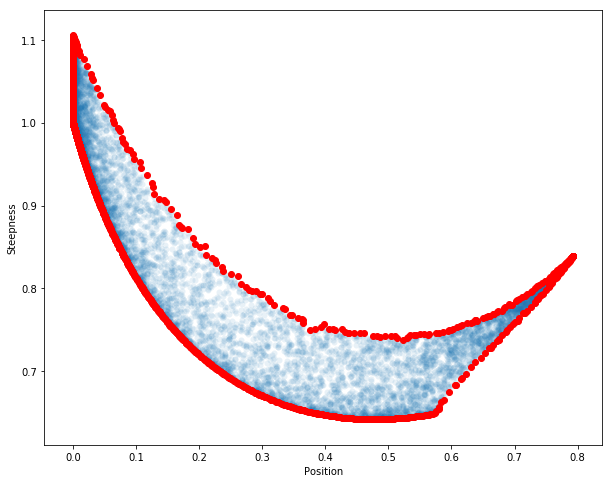

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(all_points[0], all_points[1], alpha=0.1, linewidth=0)
ax.scatter(boundary_points[1], boundary_points[2], c='red')
ax.set_xlabel('Position')
ax.set_ylabel('Steepness')
plt.show()

More details on the specifics of the algorithm for computing the boundary are forthcoming, but at present, the code is guaranteed to return a boundary that forms one simple cycle, i.e., there are no interior "holes" in the region. That is, the input points are assumed to discretely approximate a [simply connected](https://en.wikipedia.org/wiki/Simply_connected_space) region.

## A peek under the hood

If you open the main C++ script, ``src/get_boundary.cpp``, you'll find the following two lines: 

```
    Boundary2D boundary(x, y);                                                  
    AlphaShape2DProperties bound_data = boundary.getBoundary(true, true); 
```

All of the preceding lines are devoted to argument-checking (*Did you supply exactly two arguments, and does the first argument indicate an existing file?*) and parsing the input file; all of the succeeding lines are devoted to writing the determined boundary points to the output file.

The first of the above two lines instantiates a ``Boundary2D`` object, which contains all of the definitions and methods necessary to compute the boundary of the input points (whose x- and y-coordinates are contained in the vectors, ``x`` and ``y``). The second line calls the method ``Boundary2D::getBoundary()``, which returns a so-called ``AlphaShape2DProperties`` object containing all necessary information regarding the boundary: which points are in the boundary, what is the enclosed area, and what is the value of the free parameter $\alpha$ used to compute it?

The computed boundary is an [**$\alpha$-shape**](https://en.wikipedia.org/wiki/Alpha_shape) of the input points. Using the definitions introduced in [this paper](http://pub.ist.ac.at/~edels/Papers/1994-J-04-3DAlphaShapes.pdf), we define the $\alpha$-shape of a point cloud $X$ as the undirected graph, $G_\alpha(V, E)$, in which we include two points $x, y \in X$ as vertices and draw an edge between them if, and only if, there exists a circle of radius $\alpha$ containing $x$ and $y$ that does not include any other point in $X$ in it or its interior. It is easy to show that: 

- For all sufficiently small $\alpha$, that is, for all $0 \leq \alpha < \min_{x, y \in X}{\| x - y \|_2}$, where $\| x - y \|_2$ denotes Euclidean distance between $x$ and $y$, the $\alpha$-shape is empty. 
- For all sufficiently large $\alpha$, the $\alpha$-shape is the convex hull of $X$.

Thus, we can interpret $\alpha$ as a parameter that controls the granularity of the boundary: as we increase $\alpha$, the boundary will smoothen and consist of fewer connected components, until we eventually end up with the convex hull of $X$.

The ``Boundary2D::getBoundary()`` method accepts two boolean arguments (which I have both set to ``true``, as indicated above). These arguments control the value of $\alpha$ that is set by this method to compute the boundary. To get a sense of what these arguments mean, it is worth taking a look at the header file, ``include/boundaries.hpp``, containing the ``Boundary2D`` class definitions:

```
    AlphaShape2DProperties getBoundary(bool connected = true, bool simply_connected = false)
    {
        /* METHOD DEFINITION HERE */
    }
```

Reading through the method definition, we find that: 

- The method returns an ``AlphaShape2DProperties`` object, as mentioned above. 
- The first argument is called ``connected``, has a default value of ``true``, and (looking further into the method) represents whether or not the enclosed region is **connected**: $\alpha$ is set to the **smallest** value possible such that the boundary encloses a connected region.
- The second argument is called ``simply_connected``, has a default value of ``false``, and (again, looking further into the method) represents whether or not the enclosed region is **simply connected**: $\alpha$ is set to the **smallest** value possible such that the boundary encloses a simply connected region.

Thus, the call to ``Boundary2D::getBoundary()`` in ``src/get_boundary.cpp`` guarantees that the output boundary encloses a simply connected region, in which case the boundary should consist of a single simple cycle (no self-intersections), with no interior holes in the enclosed region. This is indeed what we see in the above example. 